# Initialize Libs

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels

# CONSTANTS

In [3]:
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/time/submission1/'

# Load Energy and Temp Dataset

In [19]:
temp_part_one = pd.read_csv(BASE_DIR + 'hr_temp_20170201-20200131_subset[1].csv') 
temp_part_two = pd.read_csv(BASE_DIR + 'hr_temp_20200201-20200229_subset[1].csv') 
meter_data = pd.read_csv(BASE_DIR + 'hrl_load_metered_-_20170201-20200131[1].csv') 



# Explore Data

In [20]:
print(temp_part_one.head())
print(temp_part_one.tail())
print (meter_data.head())
print (meter_data.tail())


       STATION                 DATE  ... SOURCE  HourlyDryBulbTemperature
0  72520514762  2017-02-01T00:53:00  ...      7                      37.0
1  72520514762  2017-02-01T01:53:00  ...      7                      37.0
2  72520514762  2017-02-01T02:53:00  ...      7                      36.0
3  72520514762  2017-02-01T03:53:00  ...      7                      36.0
4  72520514762  2017-02-01T04:53:00  ...      7                      36.0

[5 rows x 5 columns]
           STATION                 DATE  ... SOURCE  HourlyDryBulbTemperature
26275  72520514762  2020-01-31T19:53:00  ...      7                      34.0
26276  72520514762  2020-01-31T20:53:00  ...      7                      33.0
26277  72520514762  2020-01-31T21:53:00  ...      7                      33.0
26278  72520514762  2020-01-31T22:53:00  ...      7                      33.0
26279  72520514762  2020-01-31T23:53:00  ...      7                      34.0

[5 rows x 5 columns]
  datetime_beginning_utc datetime_beginning_

# CleanUp Data & Visualize Interpolation

                     temp        mw  hour  weekday  month  year
datetime_conv                                                  
2018-10-25 12:53:00   NaN  1569.389    12        3     10  2018
2018-12-25 02:53:00   NaN  1269.577     2        1     12  2018
2018-12-25 03:53:00   NaN  1263.540     3        1     12  2018
2018-12-25 04:53:00   NaN  1271.892     4        1     12  2018
2018-12-25 05:53:00   NaN  1304.021     5        1     12  2018
2018-12-25 06:53:00   NaN  1340.344     6        1     12  2018
2018-12-25 07:53:00   NaN  1380.992     7        1     12  2018
2018-12-25 08:53:00   NaN  1395.445     8        1     12  2018
2018-12-25 09:53:00   NaN  1422.708     9        1     12  2018
2018-12-25 10:53:00   NaN  1438.822    10        1     12  2018
2018-12-25 11:53:00   NaN  1413.274    11        1     12  2018
2018-12-25 12:53:00   NaN  1394.176    12        1     12  2018
2018-12-25 13:53:00   NaN  1375.023    13        1     12  2018
2018-12-25 14:53:00   NaN  1354.344    1

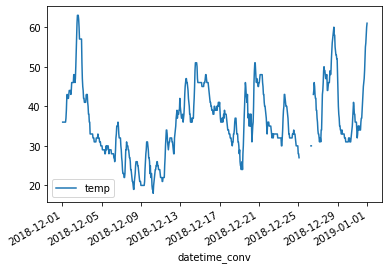

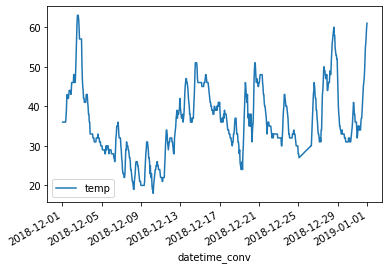

In [60]:
temp_part_one['datetime_conv'] = pd.to_datetime(temp_part_one['DATE']) 
temp_part_one = temp_part_one.rename(columns={'HourlyDryBulbTemperature':'temp'})
clean_temp = temp_part_one.drop(['DATE', 'REPORT_TYPE', 'SOURCE', 'STATION'], axis=1)
clean_temp = clean_temp.join(meter_data['mw'])
clean_temp['hour'] = clean_temp['datetime_conv'].map(lambda x: x.hour)
clean_temp['weekday'] = clean_temp['datetime_conv'].map(lambda x: x.dayofweek)
clean_temp['month'] = clean_temp['datetime_conv'].map(lambda x: x.month)
clean_temp['year'] = clean_temp['datetime_conv'].map(lambda x: x.year)
clean_temp = clean_temp.set_index('datetime_conv')

print(clean_temp[pd.isna(clean_temp['temp'])].head())

clean_temp[(clean_temp['year']==2018) & (clean_temp['month'] == 12)].plot(y='temp')
clean_temp = clean_temp.interpolate()
clean_temp[(clean_temp['year']==2018) & (clean_temp['month'] == 12)].plot(y='temp')


# Split Test and TrainData

In [70]:
DATA_SPLIT_DATE = '2020-01-01'

train_data = clean_temp[clean_temp.index < DATA_SPLIT_DATE]
test_data = clean_temp[clean_temp.index >= DATA_SPLIT_DATE]

print('TRAIN DATA')
print(train_data.head())
print(train_data.shape)

print('TEST DATA')
print(test_data.head())
print(test_data.shape)




TRAIN DATA
                     temp        mw  hour  weekday  month  year
datetime_conv                                                  
2017-02-01 00:53:00  37.0  1419.881     0        2      2  2017
2017-02-01 01:53:00  37.0  1379.505     1        2      2  2017
2017-02-01 02:53:00  36.0  1366.106     2        2      2  2017
2017-02-01 03:53:00  36.0  1364.453     3        2      2  2017
2017-02-01 04:53:00  36.0  1391.265     4        2      2  2017
(25536, 6)
TEST DATA
                     temp        mw  hour  weekday  month  year
datetime_conv                                                  
2020-01-01 00:53:00  31.0  1363.428     0        2      1  2020
2020-01-01 01:53:00  29.0  1335.975     1        2      1  2020
2020-01-01 02:53:00  30.0  1296.817     2        2      1  2020
2020-01-01 03:53:00  30.0  1288.403     3        2      1  2020
2020-01-01 04:53:00  31.0  1292.263     4        2      1  2020
(744, 6)


(25536, 6)